In [1]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

In [2]:
filename = 'pokemon.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo pokemon.csv


___
<div id="definindo decision tree"></div>

### Arvore de Decisao:

em processo
___

In [3]:
#Criando o nosso DataFrame com os dados do arquivo pokemon.csv
dados = pd.read_csv('pokemon.csv')
dados.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
print(list(dados)) #Todas as colunas do nosso DataFrame

['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name', 'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary']


In [5]:
tipos1 = dados['type1']
l = tipos1.value_counts()

tipos_pokemon=list(l.index) #todos os tipos

print(tipos_pokemon)

['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock', 'electric', 'poison', 'ground', 'dark', 'fighting', 'dragon', 'ghost', 'steel', 'ice', 'fairy', 'flying']


In [50]:
#Para fazer a nossa decision Tree,utilizaremos somente os dados numericos
colunas_numericas = ['type1','attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg']
dados_numericos=dados.loc[:,colunas_numericas]

dados_numericos['type1'] = dados_numericos['type1'].astype('category')
dados_numericos['type1'].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
dados_numericos

,type1,attack,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg
0,9,49,318,49,0.7,45,65,65,45,6.9
1,9,62,405,63,1.0,60,80,80,60,13.0
2,9,100,625,123,2.0,80,122,120,80,100.0
3,6,52,309,43,0.6,39,60,50,65,8.5
4,6,64,405,58,1.1,58,80,65,80,19.0
...,...,...,...,...,...,...,...,...,...,...
796,16,101,570,103,9.2,97,107,101,61,999.9
797,9,181,570,131,0.3,59,59,31,109,0.1
798,1,101,570,53,5.5,223,97,53,43,888.0
799,14,107,600,101,2.4,97,127,89,79,230.0


In [51]:
filtro_Nan = dados_numericos["height_m"].isnull()
filtro_Nan2 = dados_numericos["weight_kg"].isnull()
dados_numericos.loc[filtro_Nan,'height_m'] = 0
dados_numericos.loc[filtro_Nan2,'weight_kg'] = 0
dados_numericos.isnull().sum()

type1         0
attack        0
base_total    0
defense       0
height_m      0
hp            0
sp_attack     0
sp_defense    0
speed         0
weight_kg     0
dtype: int64

In [54]:
dados_train, dados_test = train_test_split(dados_numericos,test_size=0.40, random_state=42)


In [55]:
dados_train.type1

257    17
766     0
544     0
15     12
3       6
       ..
71     17
106     5
270    17
435    16
102     9
Name: type1, Length: 480, dtype: category
Categories (18, int64): [0, 1, 2, 3, ..., 14, 15, 16, 17]

In [56]:
from sklearn import tree
X = dados_train[['attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg']]
Y = dados_train['type1']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [57]:
X_test = dados_test[['attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg']]
Y_test = dados_test['type1']

In [58]:
dicionario = {'column_name':['attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg'],'feature_importances':list(clf.feature_importances_)}
df = pd.DataFrame(data=dicionario)
df.sort_values("feature_importances",ascending=False)

,column_name,feature_importances
2,defense,0.145796
8,weight_kg,0.138519
6,sp_defense,0.122594
5,sp_attack,0.120365
1,base_total,0.117558
0,attack,0.102498
4,hp,0.089354
3,height_m,0.082535
7,speed,0.080781


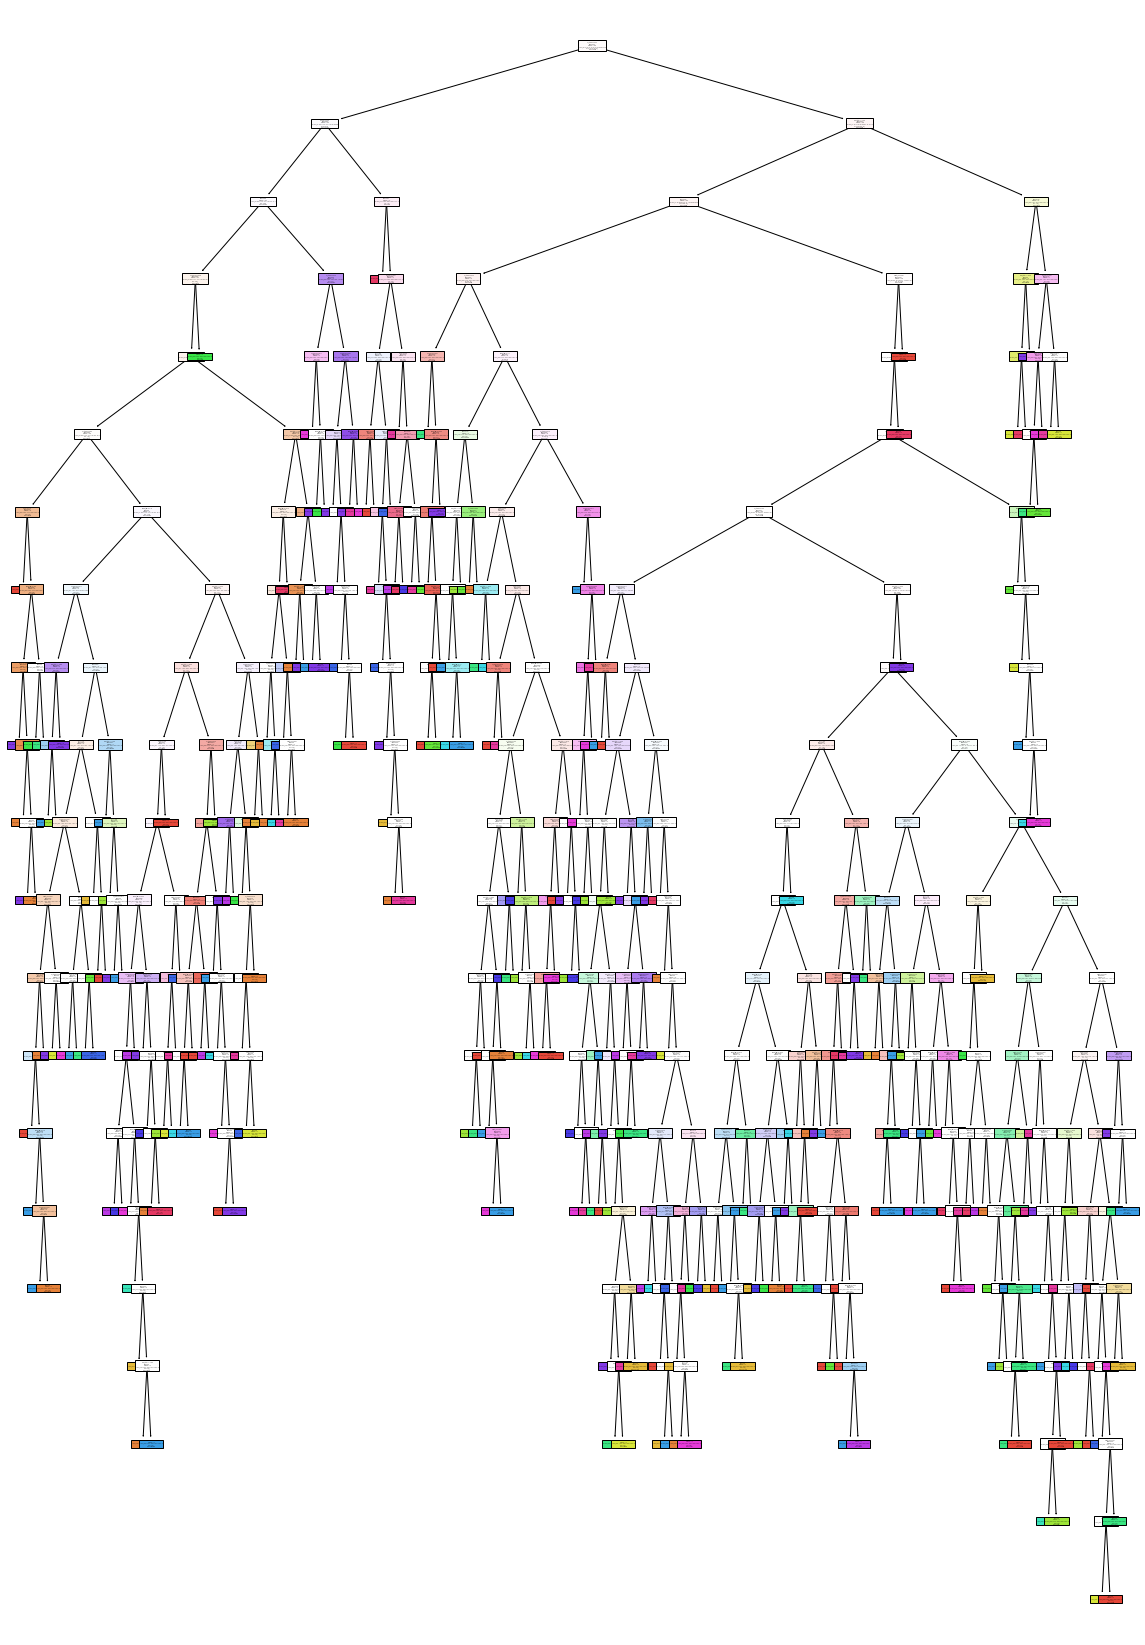

In [59]:
fig = plt.figure(figsize=(20,30))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=tipos_pokemon,
                   filled=True)
#fig.savefig("decistion_tree.png")

In [45]:
clf.score(X,Y)

1.0

In [61]:
clf.score(X_test,Y_test)

0.16510903426791276